In [18]:
import pandas as pd #Biblioteca para manipulação de dados e criação de dataframes
import numpy as np # Biblioteca para calcúlos numéricos
import matplotlib.pyplot as plt # Bibliteca para criação de gráficos
import seaborn as sns # Bibliteca para criação de gráficos
from lifelines import KaplanMeierFitter # Biblioteca para criação dos estimadores de Kapaln-Meier
from IPython.display import Image # Vamos usar biblioteca apra mostrar imagens no nosso notebook


## Importando dados

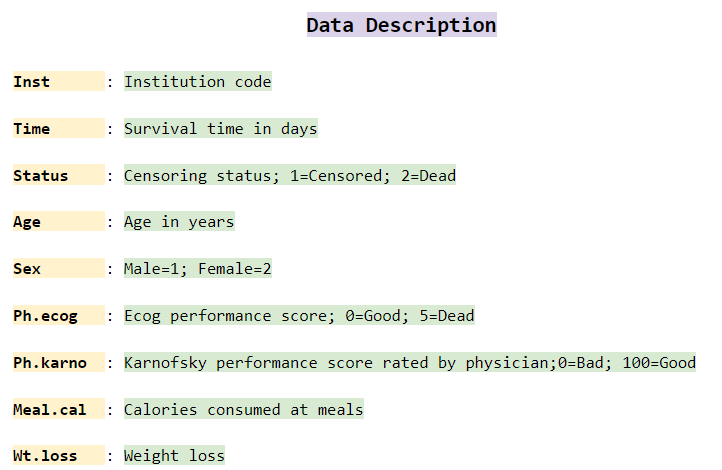

In [8]:
lung = pd.read_csv('lung.csv')
lung.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [11]:
#Vamos analisar quais os nomes das colunas
lung.columns

Index(['Unnamed: 0', 'inst', 'time', 'status', 'age', 'sex', 'ph.ecog',
       'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss'],
      dtype='object')

### As colunas condizem com as informação de descrição da base de dados.


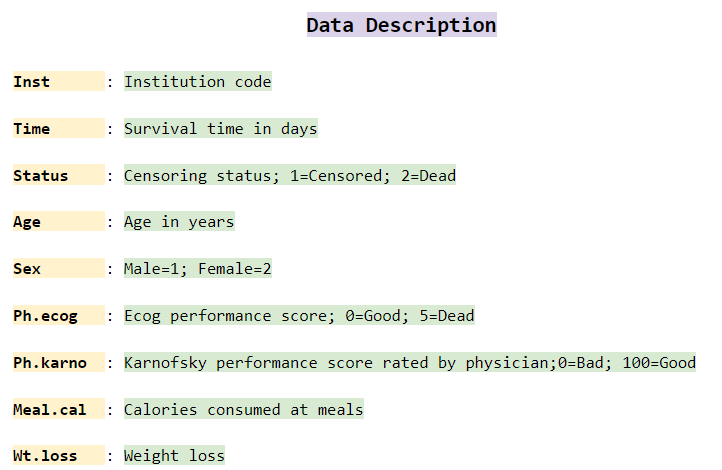

In [14]:
Image(filename='./img/database_desc.png')

### Vamos analizar com mais detalhe o dataset **Lung** para descobrir sobre os tipos de dados e se há dados nulos.

In [16]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


### Como pdoemos ver no total temos 228 registros, entretanto temos dados faltantes nas colunas *inst*, *ph.ecog*, *ph.karno*, *meal.cal*, e *wt.loss*.

### Vamos olhar alguns dados estatísticos da nossa base de dados.

In [17]:
lung.describe()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,228.00000,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,114.50000,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,65.96211,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.00000,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,57.75000,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,114.50000,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,171.25000,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,228.00000,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


## Distribuição por Sexo

AxesSubplot(0.125,0.125;0.775x0.755)


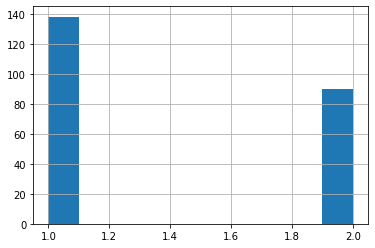

In [36]:
print(lung['sex'].hist())


### Instaciando um objeto classe KaplanMeierFitter

In [37]:
kmf = KaplanMeierFitter()

### Oganiozando o dataset

### Vamos criar uma nova coluna chamada **dead**, se valor do status for 0 então paciente está vivo, caso seja 1 ele morreu.

In [41]:
lung.loc[lung.status == 1, 'dead'] = 0
lung.loc[lung.status == 2, 'dead'] = 1
lung.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


### Aqui vamos criar um modelo probabilistico usando KP.

In [43]:
kmf.fit(durations= lung['time'], event_observed= lung['dead'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

### Vamos dar uma olhada na table a de eventos.

In [44]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224
13.0,2,2,0,0,223
...,...,...,...,...,...
840.0,1,0,1,0,5
883.0,1,1,0,0,4
965.0,1,0,1,0,3
